**DATA EXPLORATION**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime, timedelta
from sklearn import datasets
register_matplotlib_converters()

In [16]:
import os
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
path = 

In [4]:
filePaths = []
for filename in os.listdir(path):
  f1 = path+str(filename)
  print(f1)
  filePaths.append(f1)

/content/drive/My Drive/data/realAdExchange/exchange-4_cpc_results.csv
/content/drive/My Drive/data/realAdExchange/exchange-3_cpc_results.csv
/content/drive/My Drive/data/realAdExchange/exchange-2_cpm_results.csv
/content/drive/My Drive/data/realAdExchange/exchange-3_cpm_results.csv
/content/drive/My Drive/data/realAdExchange/exchange-4_cpm_results.csv
/content/drive/My Drive/data/realAdExchange/exchange-2_cpc_results.csv


In [5]:
df_1   = pd.read_csv(filePaths[0])

In [6]:
df_1.head()

,timestamp,value
0,2011-07-01 00:15:01,0.091795
1,2011-07-01 01:15:01,0.074414
2,2011-07-01 02:15:01,0.056984
3,2011-07-01 03:15:01,0.071225
4,2011-07-01 04:15:01,0.045466


In [7]:
df_1['timestamp'] = pd.to_datetime(df_1.timestamp)

In [ ]:
dataFrames = []
for filename in filePaths:
  df_1 = pd.read_csv(filename)
  df_1['timestamp'] = pd.to_datetime(df_1.timestamp)
  dataFrames.append(df_1)
  print(filename)
  plt.figure(figsize=(10,4))
  plt.plot(df_1.value)
  plt.title(filename +" value over time ", fontsize = 20)
  plt.ylabel("value" , fontsize = 16)
  print("*"*50)
#for year in range(2011,2021):
#    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha = 0.2)

In [ ]:
len(dataFrames)

In [ ]:
acf_plot = plot_acf(df_1.value, lags = 100)

In [ ]:
pacf = plot_pacf(df_1.value, lags = 100)

**NYC_Taxi_Data**

In [17]:
path = "/content/drive/My Drive/data/realKnownCause/nyc_taxi.xlsx"

In [18]:
data_Taxi = pd.read_excel(path)
data_Taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
 2   Anomaly    10320 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 242.0+ KB


In [19]:
data_Taxi['timestamp'] = pd.to_datetime(data_Taxi['timestamp'])
data_Taxi.head()

,timestamp,value,Anomaly
0,2014-07-01 00:00:00,10844,0
1,2014-07-01 00:30:00,8127,0
2,2014-07-01 01:00:00,6210,0
3,2014-07-01 01:30:00,4656,0
4,2014-07-01 02:00:00,3820,0


In [20]:
data_Taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10320 non-null  datetime64[ns]
 1   value      10320 non-null  int64         
 2   Anomaly    10320 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 242.0 KB


In [21]:
data_Taxi = data_Taxi.set_index('timestamp').resample("H").mean().reset_index()

In [22]:
data_Taxi

,timestamp,value,Anomaly
0,2014-07-01 00:00:00,9485.5,0.0
1,2014-07-01 01:00:00,5433.0,0.0
2,2014-07-01 02:00:00,3346.5,0.0
3,2014-07-01 03:00:00,2216.5,0.0
4,2014-07-01 04:00:00,2189.5,0.0
...,...,...,...
5155,2015-01-31 19:00:00,28288.5,0.0
5156,2015-01-31 20:00:00,24138.0,0.0
5157,2015-01-31 21:00:00,24194.5,0.0
5158,2015-01-31 22:00:00,26515.0,0.0


In [23]:
data_Taxi["Hour"] = data_Taxi.timestamp.dt.hour

In [24]:
data_Taxi["weekday"] = pd.Categorical(data_Taxi.timestamp.dt.strftime("%A"), categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)

In [25]:
data_Taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5160 entries, 0 to 5159
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  5160 non-null   datetime64[ns]
 1   value      5160 non-null   float64       
 2   Anomaly    5160 non-null   float64       
 3   Hour       5160 non-null   int64         
 4   weekday    5160 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(1)
memory usage: 166.8 KB


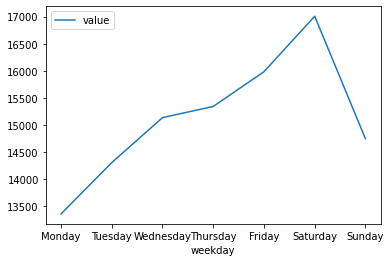

In [27]:
data_Taxi[['value', 'weekday']].groupby('weekday').mean().plot()

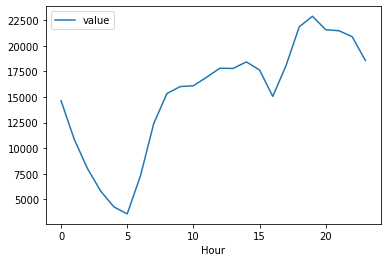

In [29]:
data_Taxi[['value', 'Hour']].groupby('Hour').mean().plot()

In [30]:
# plot 
import plotly.express as px
fig = px.line(data_Taxi, x="timestamp", y="value", title='NYC Taxi Trips')
fig.update_xaxes(
    rangeslider_visible = True,
)
fig.show()

In [32]:
from sklearn.ensemble import IsolationForest

In [33]:
model = IsolationForest(contamination = 0.004)
model.fit(data_Taxi[['value']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.004)

In [35]:
data_Taxi['outliers'] = pd.Series(model.predict(data_Taxi[['value']])).apply(lambda x: 'yes' if(x == -1) else 'no')

In [37]:
data_Taxi.query('outliers == "yes"')

,timestamp,value,Anomaly,Hour,weekday,outliers
1631,2014-09-06 23:00:00,29418.5,0.0,23,Saturday,yes
2135,2014-09-27 23:00:00,28024.5,0.0,23,Saturday,yes
2639,2014-10-18 23:00:00,28253.5,0.0,23,Saturday,yes
2971,2014-11-01 19:00:00,27912.0,0.0,19,Saturday,yes
2977,2014-11-02 01:00:00,37204.5,0.0,1,Sunday,yes
3143,2014-11-08 23:00:00,27926.0,0.0,23,Saturday,yes
3311,2014-11-15 23:00:00,27713.0,0.0,23,Saturday,yes
3479,2014-11-22 23:00:00,28299.0,0.0,23,Saturday,yes
4417,2015-01-01 01:00:00,29292.0,0.0,1,Thursday,yes
4655,2015-01-10 23:00:00,28351.0,0.0,23,Saturday,yes


In [39]:
# plot 
import plotly.express as px
fig = px.scatter(data_Taxi, x="timestamp", y="value", color='outliers', hover_data=['weekday'],title='NYC Taxi Trips')
fig.update_xaxes(
    rangeslider_visible = True,
)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/express/_core.py:286: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [40]:
model = IsolationForest()
model.fit(data_Taxi[['value']])

IsolationForest()

In [41]:
score = model.decision_function(data_Taxi[['value']])

In [42]:
score

array([-0.01652586, -0.04706611, -0.0178847 , ..., -0.01728651,
       -0.10488916, -0.09657318])

(array([  1.,   7.,   8.,   2.,   1.,   4.,   2.,   3.,   5.,   9.,   4.,
          4.,  12.,   6.,   5.,  11.,  16.,  10.,   5.,  11.,  26.,  18.,
         21.,  23.,  45.,  93., 101., 198., 334., 190., 173., 148., 211.,
        363., 356., 394., 194.,  42.,  58.,  78., 120., 226., 159., 146.,
        162., 157., 379., 158., 206., 255.]),
 array([-0.22047594, -0.21439374, -0.20831154, -0.20222934, -0.19614714,
        -0.19006494, -0.18398274, -0.17790054, -0.17181834, -0.16573614,
        -0.15965394, -0.15357174, -0.14748954, -0.14140734, -0.13532514,
        -0.12924294, -0.12316074, -0.11707854, -0.11099634, -0.10491414,
        -0.09883194, -0.09274974, -0.08666754, -0.08058534, -0.07450314,
        -0.06842094, -0.06233874, -0.05625654, -0.05017434, -0.04409214,
        -0.03800994, -0.03192774, -0.02584554, -0.01976334, -0.01368114,
        -0.00759895, -0.00151675,  0.00456545,  0.01064765,  0.01672985,
         0.02281205,  0.02889425,  0.03497645,  0.04105865,  0.04714085,
 

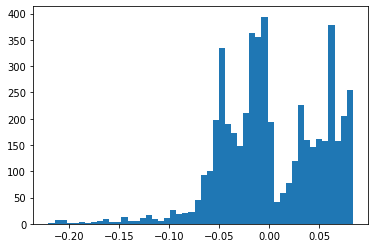

In [43]:
plt.hist(score, bins=50)

In [45]:
data_Taxi['scores'] = score

In [46]:
data_Taxi

,timestamp,value,Anomaly,Hour,weekday,outliers,scores
0,2014-07-01 00:00:00,9485.5,0.0,0,Tuesday,no,-0.016526
1,2014-07-01 01:00:00,5433.0,0.0,1,Tuesday,no,-0.047066
2,2014-07-01 02:00:00,3346.5,0.0,2,Tuesday,no,-0.017885
3,2014-07-01 03:00:00,2216.5,0.0,3,Tuesday,no,-0.057198
4,2014-07-01 04:00:00,2189.5,0.0,4,Tuesday,no,-0.060175
...,...,...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,0.0,19,Saturday,yes,-0.208235
5156,2015-01-31 20:00:00,24138.0,0.0,20,Saturday,no,-0.017008
5157,2015-01-31 21:00:00,24194.5,0.0,21,Saturday,no,-0.017287
5158,2015-01-31 22:00:00,26515.0,0.0,22,Saturday,no,-0.104889


In [47]:
data_Taxi.query('scores<-0.20')

,timestamp,value,Anomaly,Hour,weekday,outliers,scores
1631,2014-09-06 23:00:00,29418.5,0.0,23,Saturday,yes,-0.214009
2639,2014-10-18 23:00:00,28253.5,0.0,23,Saturday,yes,-0.208235
2977,2014-11-02 01:00:00,37204.5,0.0,1,Sunday,yes,-0.220476
3479,2014-11-22 23:00:00,28299.0,0.0,23,Saturday,yes,-0.208235
4417,2015-01-01 01:00:00,29292.0,0.0,1,Thursday,yes,-0.214009
4655,2015-01-10 23:00:00,28351.0,0.0,23,Saturday,yes,-0.208235
5039,2015-01-26 23:00:00,243.0,0.0,23,Monday,yes,-0.203113
5040,2015-01-27 00:00:00,94.5,0.0,0,Tuesday,yes,-0.207028
5041,2015-01-27 01:00:00,39.5,0.0,1,Tuesday,yes,-0.209424
5042,2015-01-27 02:00:00,29.0,0.0,2,Tuesday,yes,-0.209424
